In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load Dataset
gpt_evaluations = pd.read_csv('./dataset.csv')

In [4]:
# Show sample dataset
gpt_evaluations.head()

,id,model_name,sentence,grammatical_correctness,readability,descriptiveness,coherence,conciseness,explanation,seed
0,2,out-full-wfull-54M-r5,"I think both will play value, but I think the ...",7,7,8,7,6,Grammatically inconsistent and unclear. It see...,532411
1,3,out-full-wfull-54M-r5,"I think over time, those small moments really ...",9,9,10,9,8,"Good flow and understandable, but could be mor...",532411
2,4,out-full-wfull-54M-r5,That sounds like a really peaceful way to unwi...,9,9,9,9,8,"Well-written and engaging, but some sentences ...",532411
3,5,out-full-wfull-54M-r5,That’s a good point! The pressure to be 'perfect',8,9,8,8,6,"A good transition or thought, but not a comple...",532411
4,7,out-full-wfull-54M-r5,Exploring diverse cuisines and discovering hid...,10,9,9,10,9,Grammatically correct but could be slightly mo...,650555


In [5]:
# Store result gruoped in a dictionary
models_dict = {name: group for name, group in gpt_evaluations.groupby('model_name')}
full_attention_model = models_dict['out-full-wfull-54M-r5']

fixed_attention_models = {k: v for k, v in models_dict.items() if 'local' in k}
sliding_attention_models = {k: v for k, v in models_dict.items() if 'slide' in k}
model_names = models_dict.keys()
# model_names



In [6]:
fixed_attention_models.keys()
len(fixed_attention_models.keys())

5

In [7]:
sliding_attention_models.keys()
len(fixed_attention_models.keys())

5

In [8]:
num_models = len(model_names) # There are 11 Models
num_models

11

In [9]:
metrics = ['grammatical_correctness', 'readability', 'descriptiveness', 'coherence', 'conciseness']
summary_table = gpt_evaluations.groupby('model_name')[metrics].mean().reset_index()
summary_table

,model_name,grammatical_correctness,readability,descriptiveness,coherence,conciseness
0,out-full-wfull-54M-r5,8.802981,8.653273,8.504213,8.694750,8.161374
1,out-local-w128-54M-r8,8.750749,8.494012,8.464072,8.564371,8.060629
2,out-local-w16-54M-r11,7.529920,7.427527,7.527926,7.231383,6.944149
3,out-local-w2-54M-r15,5.911848,5.813117,6.282087,5.299718,5.454866
4,out-local-w32-54M-r10,8.318182,8.112170,8.121701,7.926686,7.678886
5,out-local-w64-54M-r9,8.581713,8.390929,8.362851,8.367891,7.905688
6,out-slide-w128-54M-r9,5.700972,5.599676,6.124797,5.240681,5.275527
7,out-slide-w16-54M-r5,5.533636,5.461829,5.980348,5.081633,5.108844
8,out-slide-w2-54M-r10,5.611450,5.607634,6.096947,5.212977,5.224427
9,out-slide-w32-54M-r6,5.654321,5.504630,6.093364,5.071759,5.101852


In [10]:
metrics = ['grammatical_correctness', 'readability', 'descriptiveness', 'coherence', 'conciseness']
summary_table = gpt_evaluations.groupby('model_name')[metrics].mean().reset_index()

# Add average score column
summary_table['average_score'] = summary_table[metrics].mean(axis=1)

# Sort by average score (descending) and add rank
summary_table = summary_table.sort_values(by='average_score', ascending=False).reset_index(drop=True)
summary_table['rank'] = summary_table.index + 1

summary_table

,model_name,grammatical_correctness,readability,descriptiveness,coherence,conciseness,average_score,rank
0,out-full-wfull-54M-r5,8.802981,8.653273,8.504213,8.694750,8.161374,8.563318,1
1,out-local-w128-54M-r8,8.750749,8.494012,8.464072,8.564371,8.060629,8.466766,2
2,out-local-w64-54M-r9,8.581713,8.390929,8.362851,8.367891,7.905688,8.321814,3
3,out-local-w32-54M-r10,8.318182,8.112170,8.121701,7.926686,7.678886,8.031525,4
4,out-local-w16-54M-r11,7.529920,7.427527,7.527926,7.231383,6.944149,7.332181,5
5,out-local-w2-54M-r15,5.911848,5.813117,6.282087,5.299718,5.454866,5.752327,6
6,out-slide-w128-54M-r9,5.700972,5.599676,6.124797,5.240681,5.275527,5.588331,7
7,out-slide-w2-54M-r10,5.611450,5.607634,6.096947,5.212977,5.224427,5.550687,8
8,out-slide-w32-54M-r6,5.654321,5.504630,6.093364,5.071759,5.101852,5.485185,9
9,out-slide-w64-54M-r7,5.616236,5.521771,6.065683,5.060517,5.152768,5.483395,10


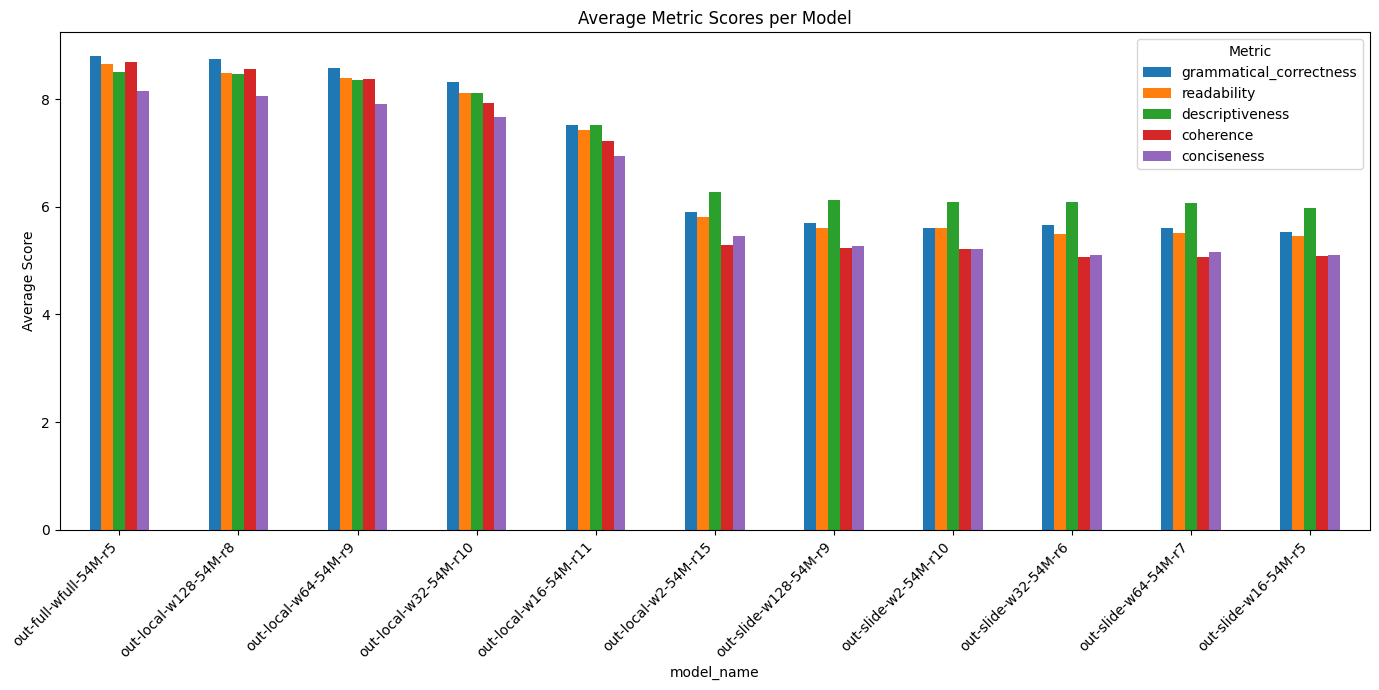

In [11]:
summary_table.set_index('model_name')[metrics].plot(kind='bar', figsize=(14, 7))
plt.ylabel('Average Score')
plt.title('Average Metric Scores per Model')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Metric')
plt.tight_layout()
plt.show()

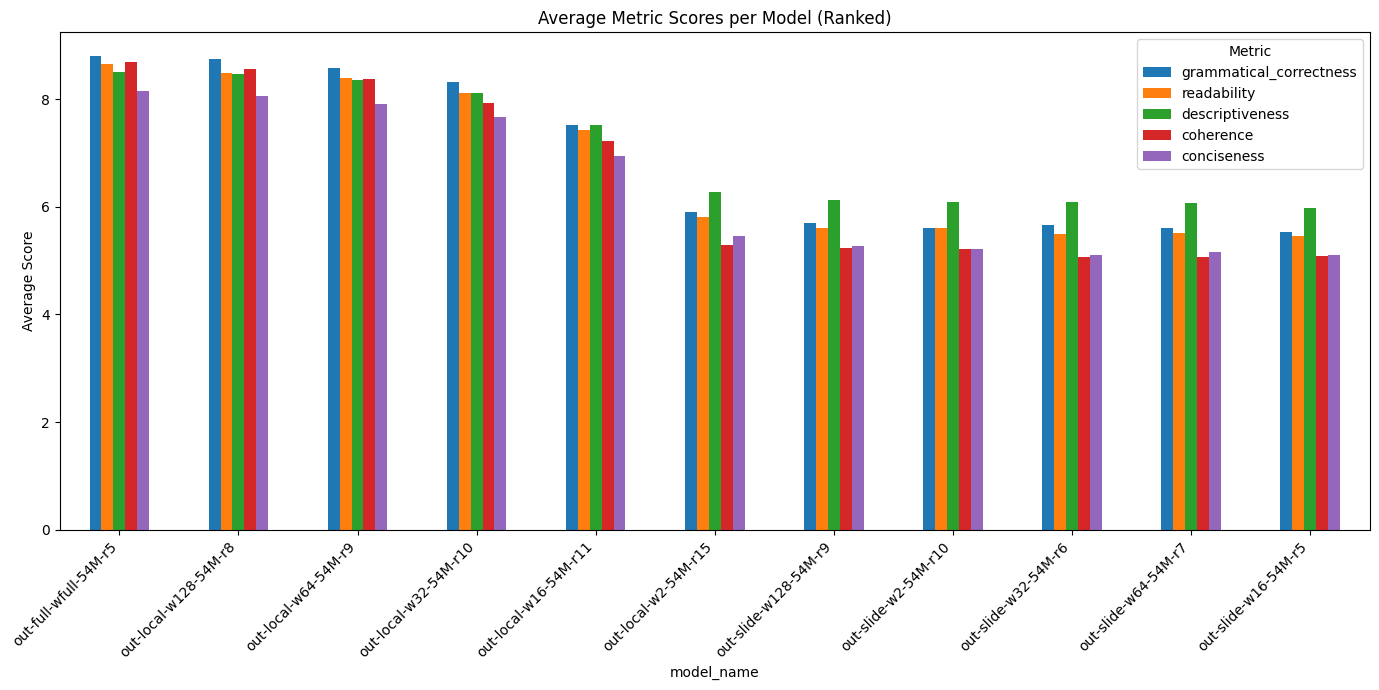

In [12]:
# Add average score column
summary_table['average_score'] = summary_table[metrics].mean(axis=1)

# Sort by average score (descending)
summary_table_ranked = summary_table.sort_values(by='average_score', ascending=False)

# Plot using the ranked table
summary_table_ranked.set_index('model_name')[metrics].plot(kind='bar', figsize=(14, 7))
plt.ylabel('Average Score')
plt.title('Average Metric Scores per Model (Ranked)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Metric')
plt.tight_layout()
plt.show()

In [13]:
def plot_radar(model_row, metrics):
    values = model_row[metrics].values.flatten().tolist()
    values += values[:1]  # repeat first value to close the circle
    angles = np.linspace(0, 2 * np.pi, len(metrics), endpoint=False).tolist()
    angles += angles[:1]

    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
    ax.plot(angles, values, 'o-', linewidth=2)
    ax.fill(angles, values, alpha=0.25)
    ax.set_thetagrids(np.degrees(angles[:-1]), metrics)
    ax.set_title(f"Radar Plot for {model_row['model_name']}")
    plt.show()

# for idx, row in summary_table.iterrows():
#     plot_radar(row, metrics)

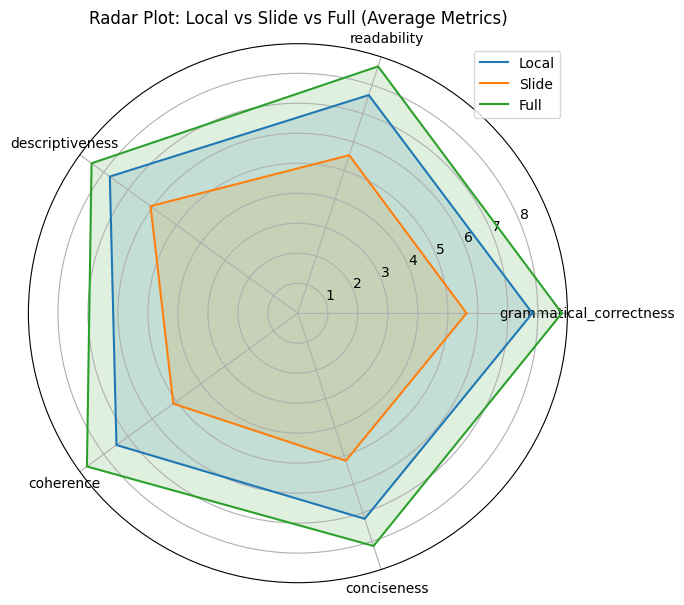

In [14]:
# Group model types
groups = {
    'local': summary_table[summary_table['model_name'].str.contains('local')],
    'slide': summary_table[summary_table['model_name'].str.contains('slide')],
    'full': summary_table[summary_table['model_name'].str.contains('full')],
}

# Calculate average metrics for each group
group_averages = {k: v[metrics].mean().tolist() for k, v in groups.items()}

# Radar plot setup
labels = metrics
num_vars = len(labels)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # close the circle

fig, ax = plt.subplots(figsize=(7, 7), subplot_kw=dict(polar=True))

for group, values in group_averages.items():
    stats = values + values[:1]  # close the circle
    ax.plot(angles, stats, label=group.capitalize())
    ax.fill(angles, stats, alpha=0.15)

ax.set_thetagrids(np.degrees(angles[:-1]), labels)
plt.title("Radar Plot: Local vs Slide vs Full (Average Metrics)")
plt.legend(loc='upper right')
plt.show()

In [15]:
# Calculate the average score across all metrics for each model
summary_table['average_score'] = summary_table[metrics].mean(axis=1)

# Sort models by average_score in descending order (best model first)
ranked_table = summary_table.sort_values(by='average_score', ascending=False).reset_index(drop=True)

# Add a rank column
ranked_table['rank'] = ranked_table.index + 1

# Display the ranked table
ranked_table[['rank', 'model_name', 'average_score']]

,rank,model_name,average_score
0,1,out-full-wfull-54M-r5,8.563318
1,2,out-local-w128-54M-r8,8.466766
2,3,out-local-w64-54M-r9,8.321814
3,4,out-local-w32-54M-r10,8.031525
4,5,out-local-w16-54M-r11,7.332181
5,6,out-local-w2-54M-r15,5.752327
6,7,out-slide-w128-54M-r9,5.588331
7,8,out-slide-w2-54M-r10,5.550687
8,9,out-slide-w32-54M-r6,5.485185
9,10,out-slide-w64-54M-r7,5.483395


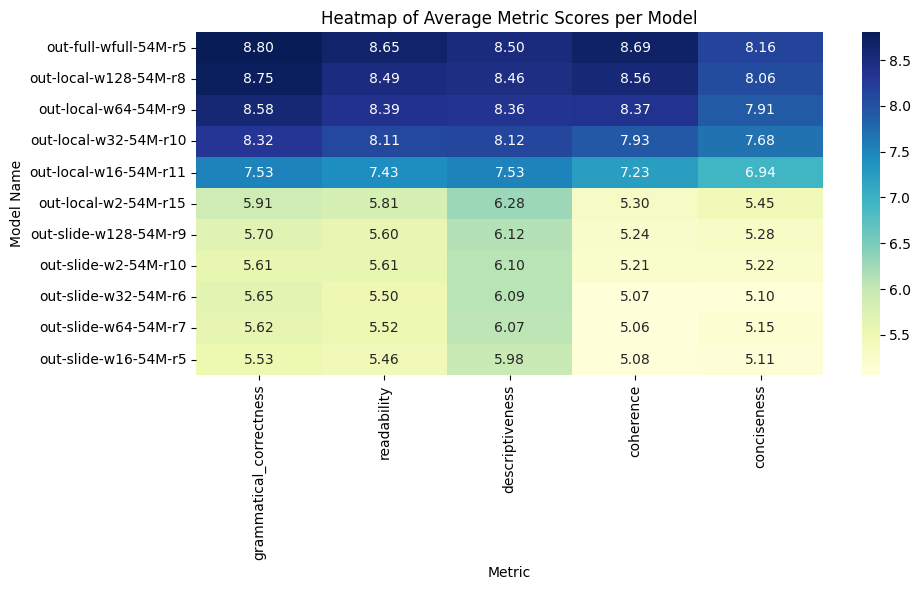

In [16]:
# Set model_name as index for the heatmap
heatmap_data = summary_table.set_index('model_name')[metrics]

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title('Heatmap of Average Metric Scores per Model')
plt.ylabel('Model Name')
plt.xlabel('Metric')
plt.tight_layout()
plt.show()

In [17]:
# Get the benchmark score
benchmark_score = ranked_table.loc[ranked_table['model_name'] == 'out-full-wfull-54M-r5', 'average_score'].values[0]

# Calculate percentage of benchmark for each model
ranked_table['percent_of_benchmark'] = (ranked_table['average_score'] / benchmark_score) * 100

# Display the updated table
ranked_table[['rank', 'model_name', 'average_score', 'percent_of_benchmark']]

,rank,model_name,average_score,percent_of_benchmark
0,1,out-full-wfull-54M-r5,8.563318,100.000000
1,2,out-local-w128-54M-r8,8.466766,98.872496
2,3,out-local-w64-54M-r9,8.321814,97.179785
3,4,out-local-w32-54M-r10,8.031525,93.789869
4,5,out-local-w16-54M-r11,7.332181,85.623127
5,6,out-local-w2-54M-r15,5.752327,67.174045
6,7,out-slide-w128-54M-r9,5.588331,65.258939
7,8,out-slide-w2-54M-r10,5.550687,64.819348
8,9,out-slide-w32-54M-r6,5.485185,64.054436
9,10,out-slide-w64-54M-r7,5.483395,64.033529


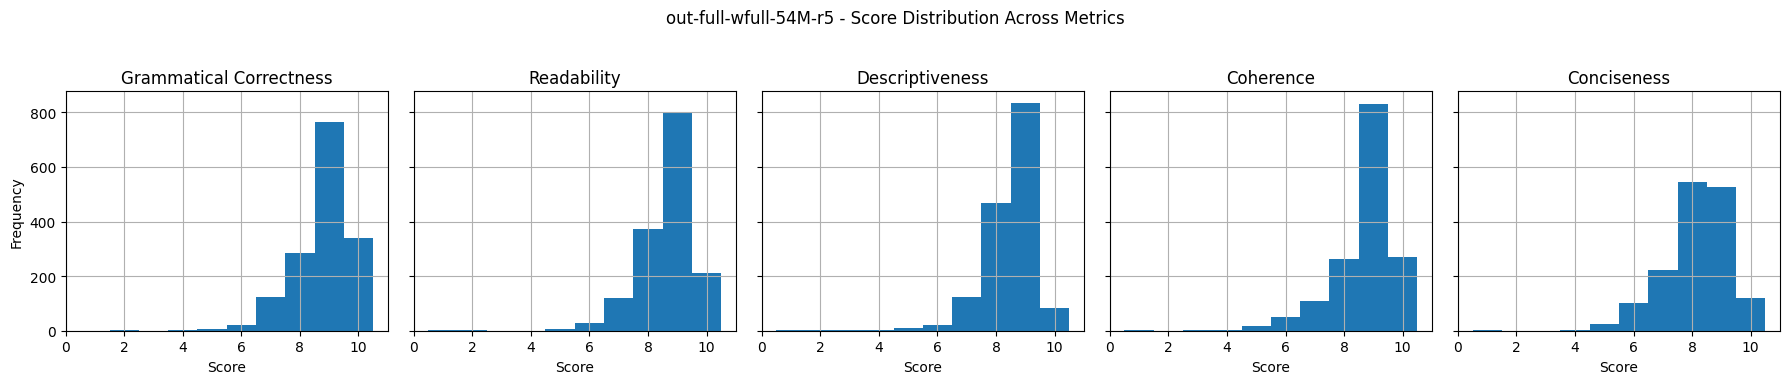

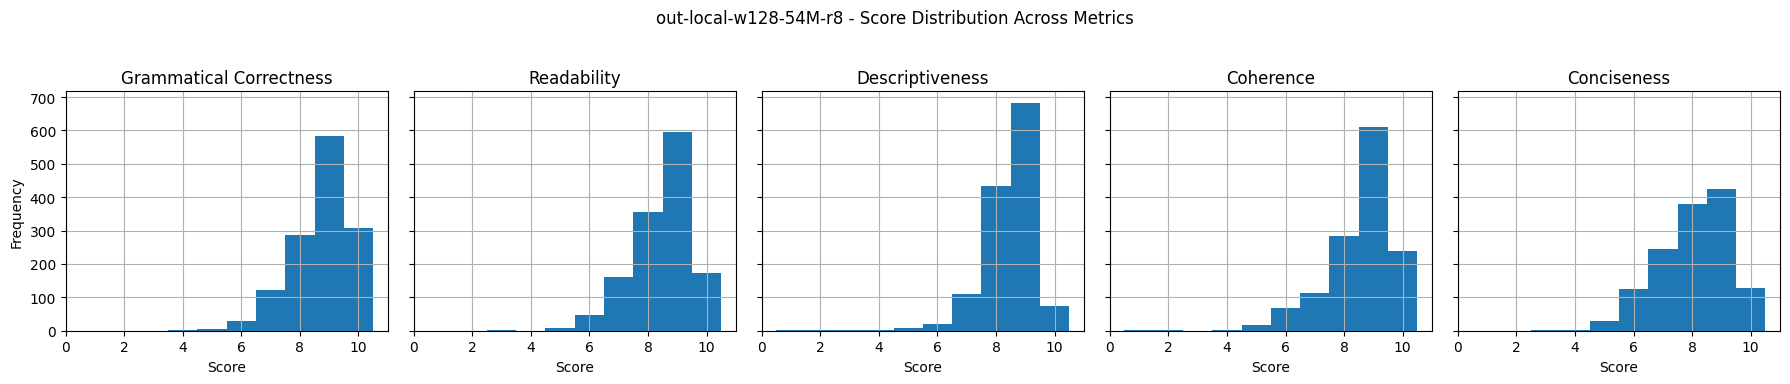

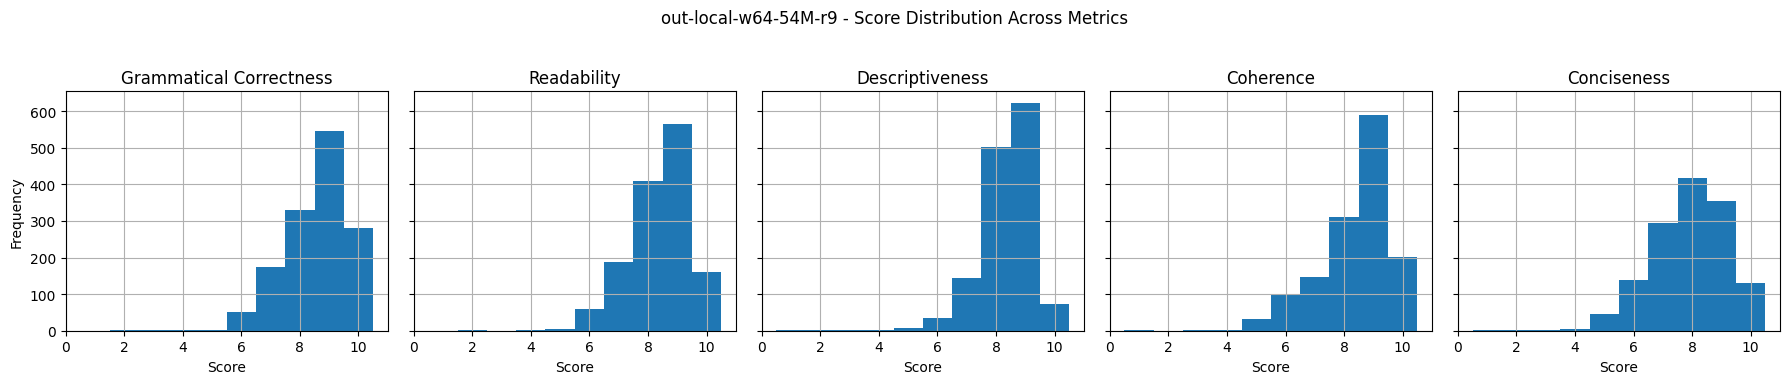

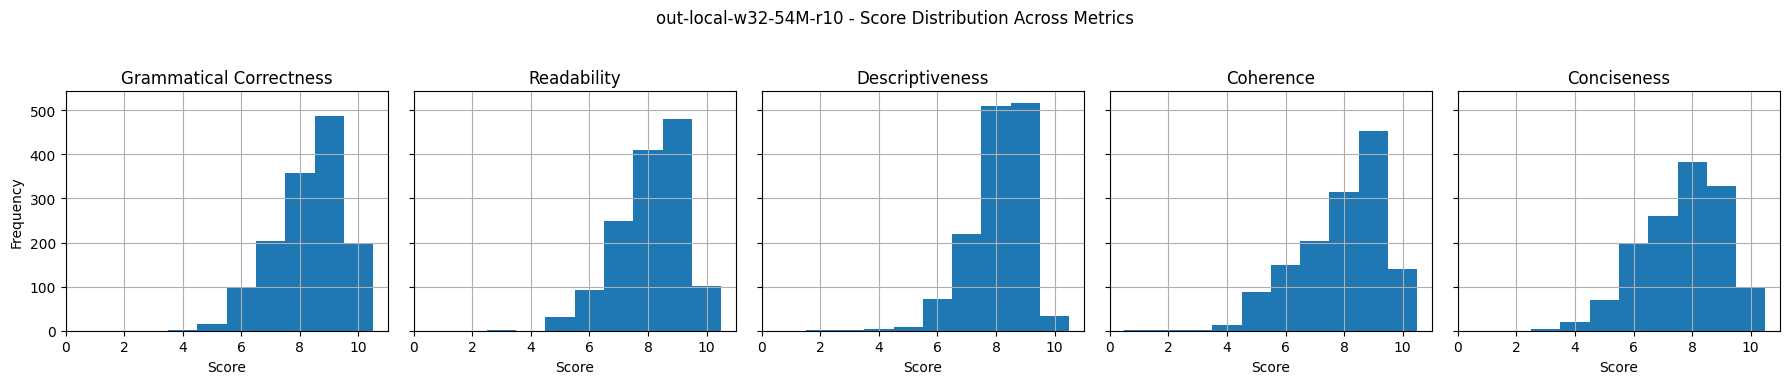

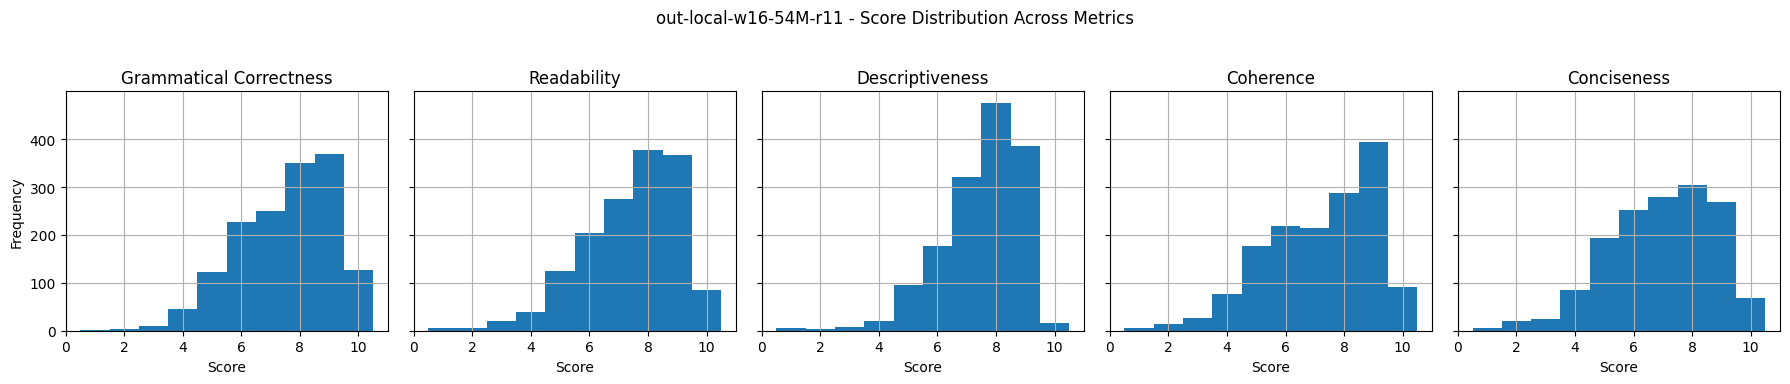

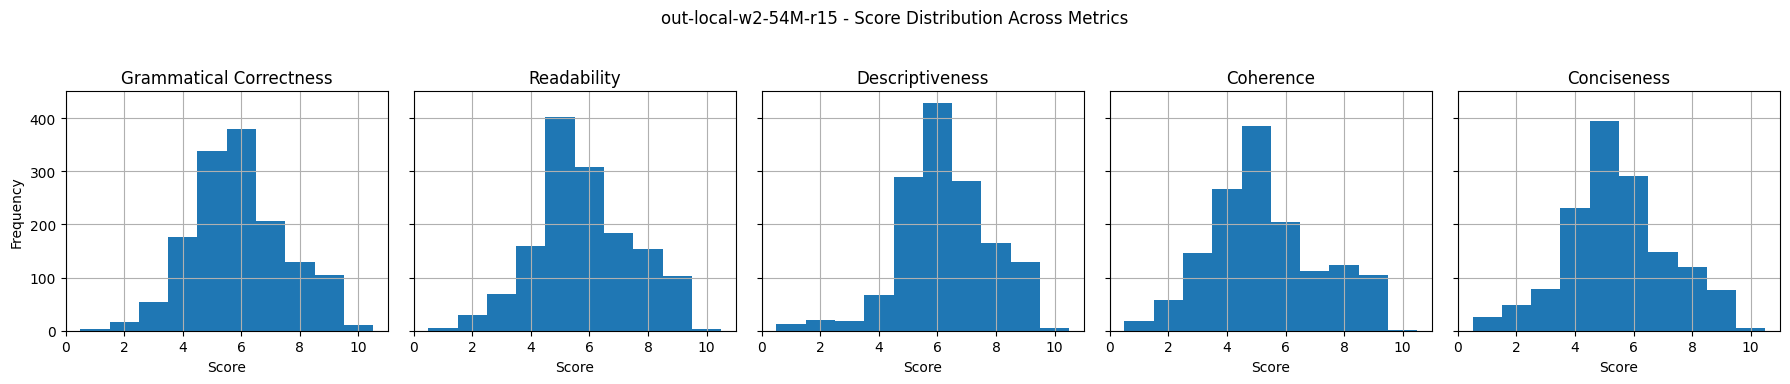

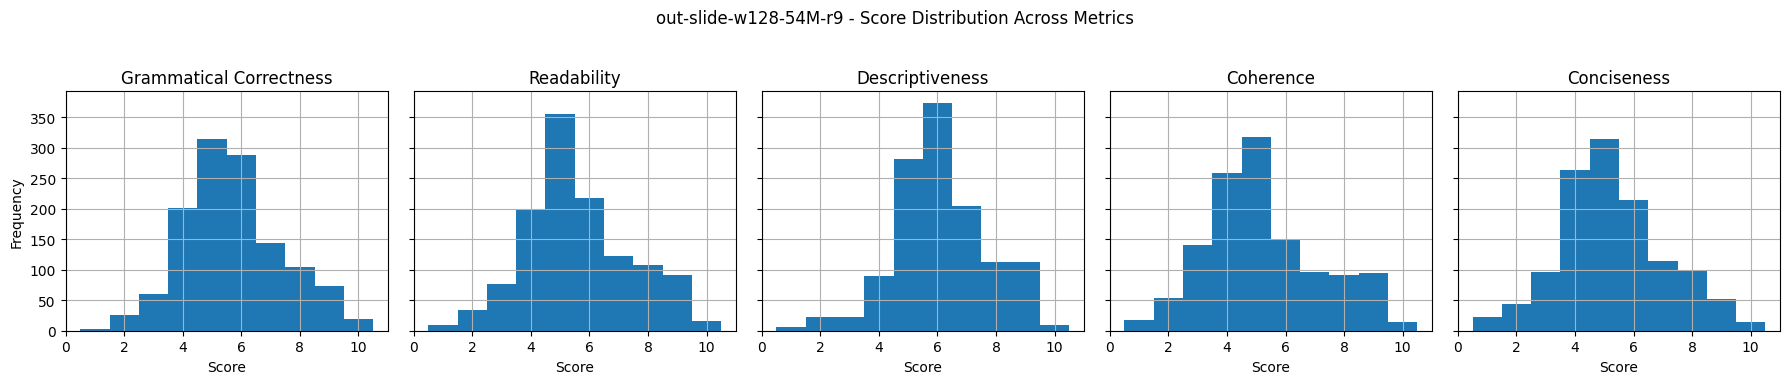

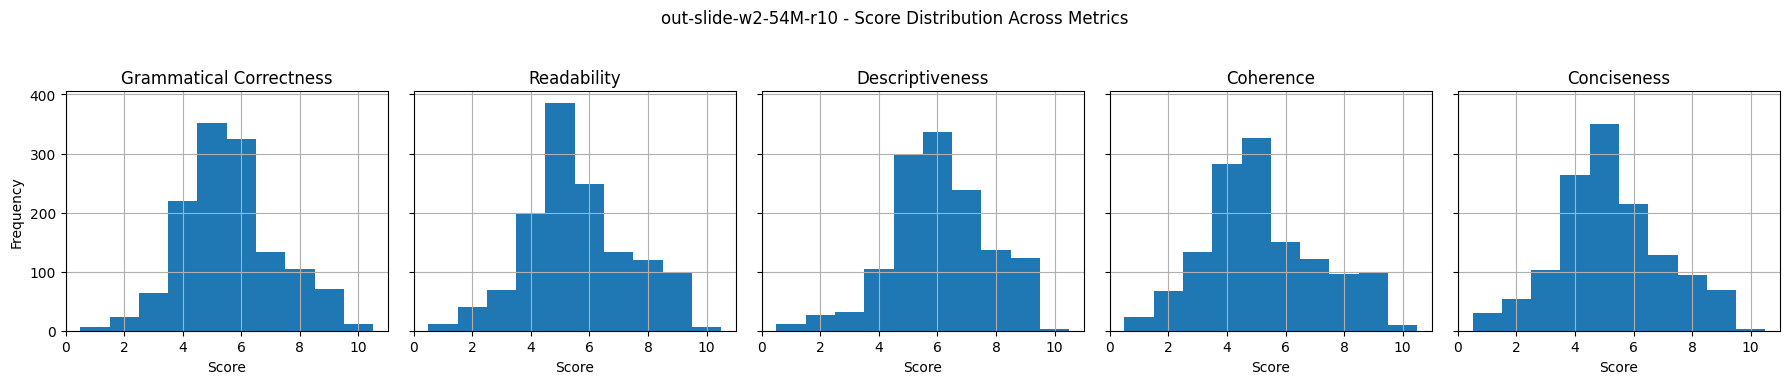

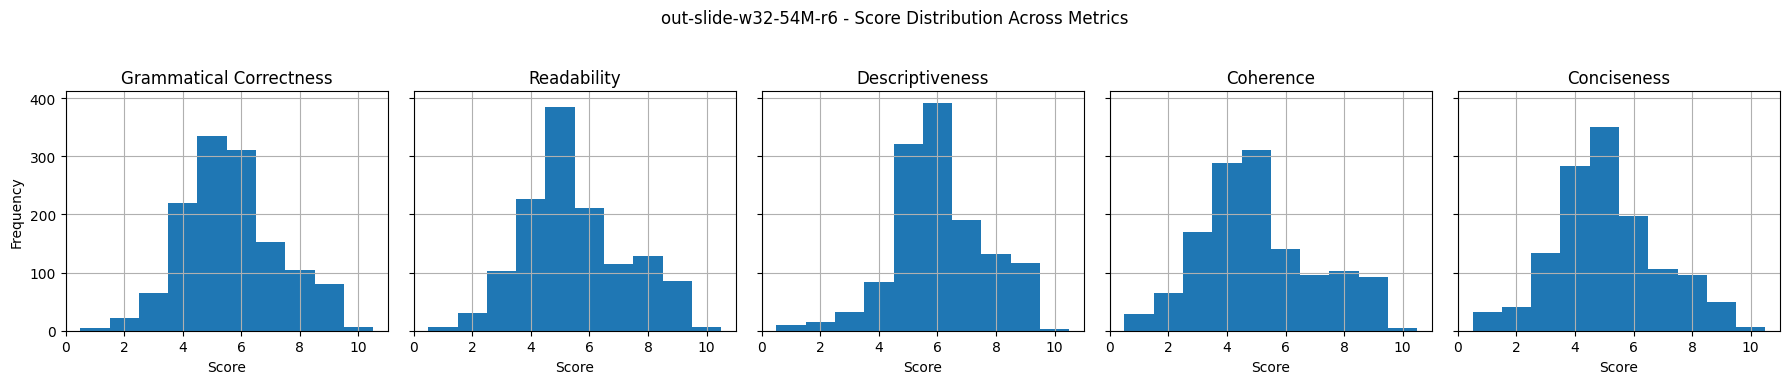

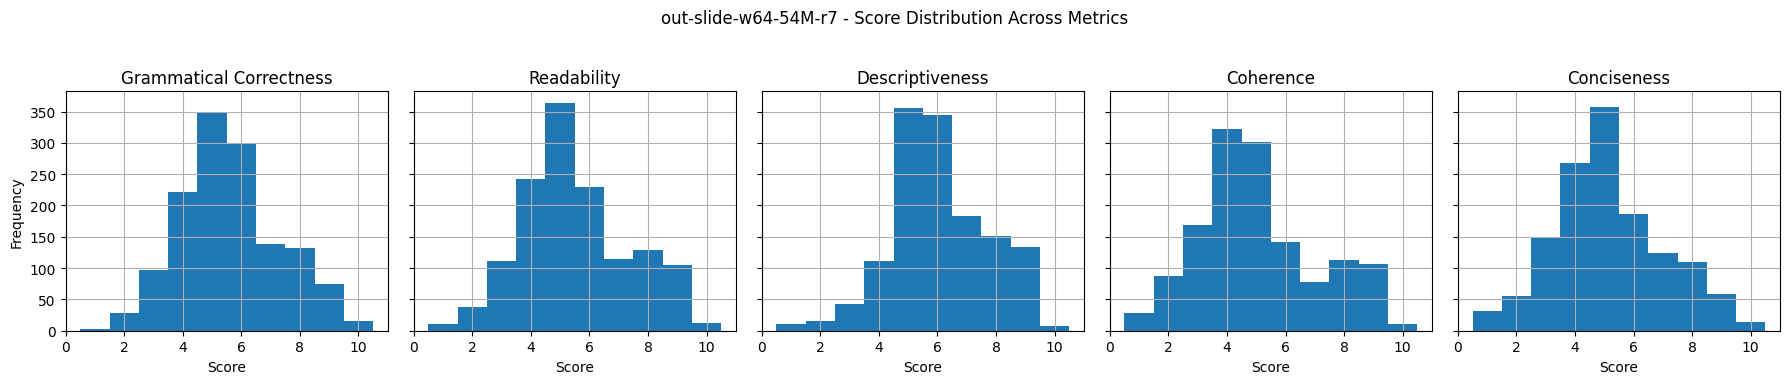

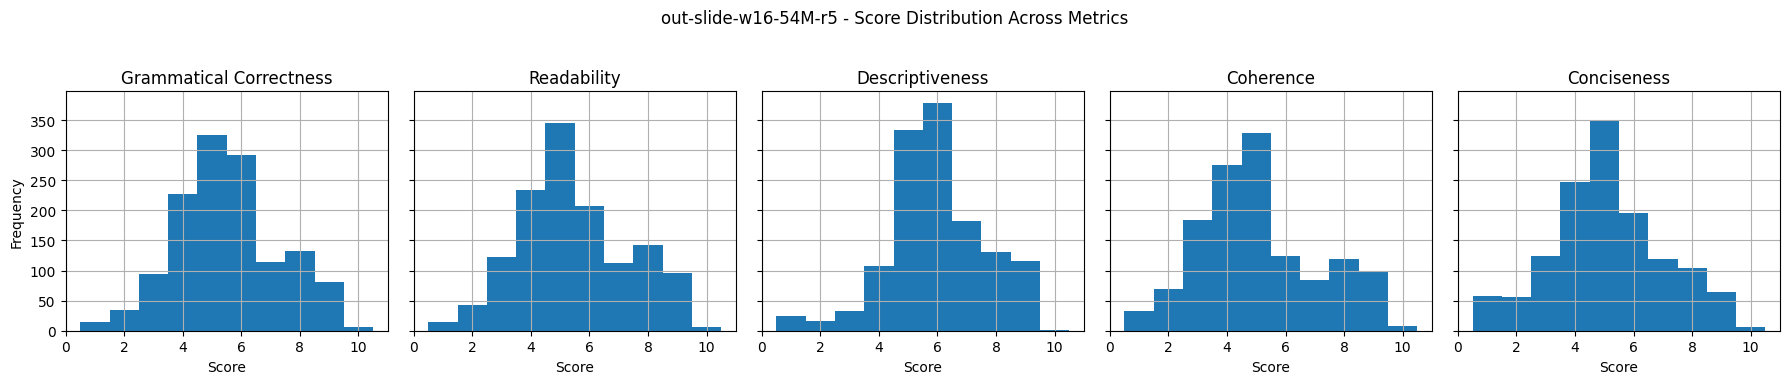

In [22]:
# Get sorted model names by average_score (descending)
sorted_models = ranked_table.sort_values(by='average_score', ascending=False)['model_name']

for model in sorted_models:
    fig, axes = plt.subplots(1, len(metrics), figsize=(18, 4), sharey=True)
    for idx, metric in enumerate(metrics):
        ax = axes[idx]
        gpt_evaluations[gpt_evaluations['model_name'] == model][metric].hist(
            bins=range(1, 12), align='left', ax=ax
        )
        ax.set_title(metric.replace('_', ' ').title())
        ax.set_xlabel('Score')
        if idx == 0:
            ax.set_ylabel('Frequency')
    plt.suptitle(f'{model} - Score Distribution Across Metrics')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()